In [33]:
# Import libraries
print("Importing libraries...")
import pandas as pd
import numpy as np
import os
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import ListedColormap

Importing libraries...


In [34]:
################################################################################################################################################
# Functions
################################################################################################################################################

#create a list of colors for scatter plot
colors = ['green', 'blue', 'yellow', 'orange', 'black', 'purple', 'pink', 'brown', 'gray', 'cyan']

#create a list of n_clusters for KMeans
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

def plot_clusters(X, n_clusters, save_location, title: str = 'Clusters', show: bool = False):
    km = KMeans(n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
    y_km = km.fit_predict(X)

    for i in range(n_clusters):
        plt.scatter(X[y_km == i, 548:549],
                    X[y_km == i, 549:560],
                    s=5,
                    c=colors[i],
                    marker='s',
                    edgecolor='black',
                    label='cluster ' + str(i + 1))
        
    plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=50, marker='*',
            c='red', edgecolor='black',
            label='centroids')
    plt.legend(scatterpoints=1)
    plt.title(title)
    plt.grid()
    if show:
        plt.show()
    plt.show() if show else plt.savefig(save_location)
    plt.close()

In [35]:

##########################################################################################################################

def plot_clusters_3d(X, n_clusters, save_location, title: str = 'Clusters', show: bool = False):
    km = KMeans(n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
    y_km = km.fit_predict(X)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n_clusters):
        ax.scatter(X[y_km == i, 0],
                   X[y_km == i, 1],
                   X[y_km == i, 2],
                   s=5,
                   c=colors[i],
                   marker='s',
                   edgecolor='black',
                   label='cluster ' + str(i + 1))

    ax.scatter(km.cluster_centers_[:, 0],
               km.cluster_centers_[:, 1],
               km.cluster_centers_[:, 2],
               s=50, marker='*',
               c='red', edgecolor='black',
               label='centroids')
    ax.legend(scatterpoints=1)
    ax.set_title(title)
    ax.grid()
    plt.show() if show else plt.savefig(save_location)
    plt.close()

##########################################################################################################################
#  ROC curve and AUC
# Create and save ROC AUC graph
def plot_roc_auc(y_test, y_prob, save_location, show: bool = False):
   n_classes = len(np.unique(y_test))
   fpr = dict()
   tpr = dict()
   roc_auc = dict()
   for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], y_prob[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

   plt.figure(figsize=(8, 6))
   for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], lw=2,
               label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

   plt.plot([0, 1], [0, 1], 'k--', lw=2)
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC AUC')
   plt.legend(loc="lower right")
   plt.show() if show else plt.savefig(save_location)
   #plt.show()
   plt.close()

##########################################################################################################################
#  load CSV files
# Function to load CSV files from a directory
def load_csv_files(directory):
    dataset = pd.DataFrame()
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dataset = pd.concat([dataset, df], ignore_index=True)
    return dataset

##########################################################################################################################

def plot_confusion_matrix(y_labels, y_preds, save_location, title, show: bool = False):
   print("Plotting " + title + " confusion matrix...")
   confusion_data = confusion_matrix(y_labels, y_preds)
   plt.figure(figsize=(8, 6))
   sns.heatmap(confusion_data, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
   plt.xlabel("Predicted")
   plt.ylabel("True")
   plt.title(title)
   plt.show() if show else plt.savefig(save_location)
   #plt.show()
   plt.close()
   print("done...")

#*************************************************************************************

def plotDecisionRegions(name, X, y, classifier, resolution, save_location, show: bool = False):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')


    plt.title("{} Decision Regions".format(name))
    plt.legend()
    plt.show() if show else plt.savefig(save_location)
    plt.close()

#*************************************************************************************

def plot_2dim_data(X_pca, y, title, save_location, show: bool = False):
   # Visualizing the PCA-transformed data
   plt.figure(figsize=(8, 6))
   plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
   plt.title(title)
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.colorbar(label='Label')
   plt.show() if show else plt.savefig(save_location)
   plt.close()

#*************************************************************************************

def plot_3dim_data_3d(pca_data, y, title, save_location, show: bool = False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Use '3d' as the projection for 3D plotting

    x = pca_data[:, 0]
    y = pca_data[:, 1]
    z = pca_data[:, 2]

    if y is not None:
        ax.scatter(x, y, z, c=y, cmap='viridis', edgecolor='k', s=40)
    else:
        ax.scatter(x, y, z, cmap='viridis', edgecolor='k', s=40)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)
    plt.show() if show else plt.savefig(save_location)
    plt.close()

#*************************************************************************************
def plot_tsne(X, y, save_location, show: bool = False):
    # Initialize t-SNE
    #tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_jobs=-1)
    tsne = TSNE(n_components=2, n_jobs=-1)

    # Run t-SNE and get the transformed 2D representation
    X_tsne_2d = tsne.fit_transform(X)

    # Scatter plot for each class label
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X_tsne_2d[y == i, 0], X_tsne_2d[y == i, 1], label=label)

    plt.legend()
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.title('2D t-SNE on Dataset')
    plt.show() if show else plt.savefig(save_location)
#*************************************************************************************

def plot_umap(X, y, save_location, show: bool = False):
    umap_model = UMAP(n_neighbors=50, min_dist=1,n_components=2)
    # Run UMAP and get the transformed 2D representation
    X_umap_2d = umap_model.fit_transform(X)

    # Scatter plot for each class label
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X_umap_2d[y == i, 0], X_umap_2d[y == i, 1], label=label)

    #plt.legend()
    plt.xlabel('UMAP feature 1')
    plt.ylabel('UMAP feature 2')
    plt.title('2D UMAP on Dataset')
    plt.show() if show else plt.savefig(save_location)

#*************************************************************************************

def plot_loss_acc(history, save_location, show: bool = False):
   print("Plotting loss and accuracy...")
   acc = history.history['acc']
   val_acc = history.history['val_acc']
   loss = history.history['loss']
   val_loss = history.history['val_loss']
   epochs = range(1, len(acc) + 1)
   # Create subplots
   plt.figure(figsize=(12, 6))

   # Subplot for accuracy
   plt.subplot(1, 2, 1)
   plt.plot(epochs, acc, 'bo', label='Training acc')
   plt.plot(epochs, val_acc, 'b', label='Validation acc')
   plt.title('Training and validation accuracy')
   plt.legend()

   # Subplot for loss
   plt.subplot(1, 2, 2)
   plt.plot(epochs, loss, 'bo', label='Training loss')
   plt.plot(epochs, val_loss, 'b', label='Validation loss')
   plt.title('Training and validation loss')
   plt.legend()

   plt.show() if show else plt.savefig(save_location)
   plt.close()
   print("done...")

#*************************************************************************************

def write_metrics(y_test, y_test_pred, y_train, y_train_pred, txt_location):
   # Calculate and print the accuracy
   test_accuracy = accuracy_score(y_test, y_test_pred)
   print("test Accuracy: %.2f%%" % (test_accuracy * 100.0))
   train_accuracy = accuracy_score(y_train, y_train_pred)
   print("train Accuracy: %.2f%%" % (train_accuracy * 100.0))
   print("\n\n\n")
   classification_report_str = classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5'])
   print(classification_report_str)
   with open(txt_location, 'w') as file:
      file.write("test Accuracy: %.2f%%" % (test_accuracy * 100.0))
      file.write("train Accuracy: %.2f%%" % (train_accuracy * 100.0))
      file.write("\n\n\n")
      file.write(classification_report_str)

#########################################################################################################################

def calculate_distortions(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    return distortions

#########################################################################################################################

def plot_elbow_method(distortions, title: str, file_path: str, show: bool = False):
    plt.plot(range(1, len(distortions)+1), distortions, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() if show else plt.show() if show else plt.show() if show else plt.show() if show else plt.savefig(file_path)
    plt.close()

#########################################################################################################################

def plot_silhouette(X, n_clusters, file_path: str, title: str = 'Silhouette', show: bool = False):
   plt.xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
   plt.ylim([0, len(X) + (n_clusters + 1) * 10])
   clusterer = KMeans(n_clusters=n_clusters,
                  init='k-means++',
                  n_init=10,
                  max_iter=300,
                  tol=1e-04,
                  random_state=0)
   cluster_labels = clusterer.fit_predict(X)
   silhouette_avg = silhouette_score(X, cluster_labels)
   print(
      "For n_clusters =",
      n_clusters,
      "The average silhouette_score is :",
      silhouette_avg,
   )

   # Compute the silhouette scores for each sample
   sample_silhouette_values = silhouette_samples(X, cluster_labels)

   y_lower = 10
   for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      plt.fill_betweenx(
         np.arange(y_lower, y_upper),
         0,
         ith_cluster_silhouette_values,
         facecolor=color,
         edgecolor=color,
         alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

   plt.title(title)
   plt.xlabel("The silhouette coefficient values")
   plt.ylabel("Cluster label")

   # The vertical line for average silhouette score of all the values
   plt.axvline(x=silhouette_avg, color="red", linestyle="--")

   plt.yticks([])  # Clear the yaxis labels / ticks
   plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
   plt.show() if show else plt.savefig(file_path)
   plt.close()

In [36]:
##########################################################################################################################
################################################################################################################################################
# Data preprocessing
################################################################################################################################################
print("Data preprocessing...")

five_cluster_save_location = 'DataExtraction/dataresults/5_clusters.png'
four_cluster_save_location = 'DataExtraction/dataresults/4_clusters.png'
three_cluster_save_location = 'DataExtraction/dataresults/3_clusters.png'
two_cluster_save_location = 'DataExtraction/dataresults/2_clusters.png'
elbow_save_location = 'DataExtraction/dataresults/elbow.png'
silhouette_save_location = 'DataExtraction/dataresults/silhouette.png'

pca_2d_save_location = 'DataExtraction/dataresults/pca_2d.png'
pca_3d_save_location = 'DataExtraction/dataresults/pca_3d.png'

lda_2d_save_location = 'DataExtraction/dataresults/lda_2d.png'
lda_3d_save_location = 'DataExtraction/dataresults/lda_3d.png'

three_cluster_save_location_3d = 'DataExtraction/dataresults/3_clusters_3d.png'


region1_path = r"Datasets/EVANSDATA/R1"
region2_path = r"Datasets/EVANSDATA/R2"
region3_path = r"Datasets/EVANSDATA/R3"
region4_path = r"Datasets/EVANSDATA/R4"
region5_path = r"Datasets/EVANSDATA/R5"

region_paths = [
    region1_path,
    region2_path,
    region3_path,
    region4_path,
    region5_path,
]

# empty dataframe to store entire dataset
full_dataset = pd.DataFrame()

# Load CSV files from each region and concatenate them
for region_path in region_paths:
    region_dataset = load_csv_files(region_path)
    full_dataset = pd.concat([full_dataset, region_dataset], ignore_index=True)


# Handling missing values by dropping rows with missing values
full_dataset.dropna(inplace=True)

# Display the shape of the combined dataset
# print the collum number that is named Ch3_20156Hz_Mag
print(full_dataset.columns.get_loc("Ch3_20156Hz_Mag"))
print(full_dataset.columns.get_loc("Ch3_20156Hz_Mag"))


y = full_dataset["Region"]
# encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)



X = full_dataset.drop(["Region"], axis=1)
# Convert empty strings to NaN
X[X == ''] = np.nan

# Convert all values to float
X = X.astype(float)


Data preprocessing...
548
548


In [37]:
print(y)
print("\n\n\n")
print(y_encoded)

0        1
1        1
2        1
3        1
4        1
        ..
47995    5
47996    5
47997    5
47998    5
47999    5
Name: Region, Length: 48000, dtype: int64




[0 0 0 ... 4 4 4]


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize PCA, here we are reducing the data to 2 dimensions for easy visualization
#FIGURE PCA OUT
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
lda2 = LDA(n_components=2)
lda3 = LDA(n_components=3)

# Fit and transform the data
X_train_pca2 = pca2.fit_transform(X_train_std)
X_test_pca2 = pca2.transform(X_test_std)

X_train_lda2 = lda2.fit_transform(X_train_std, y_train)
X_test_lda2 = lda2.transform(X_test_std)


X_train_pca3 = pca3.fit_transform(X_train_std)
X_test_pca3 = pca3.transform(X_test_std)

X_train_lda3 = lda3.fit_transform(X_train_std, y_train)
X_test_lda3 = lda3.transform(X_test_std)

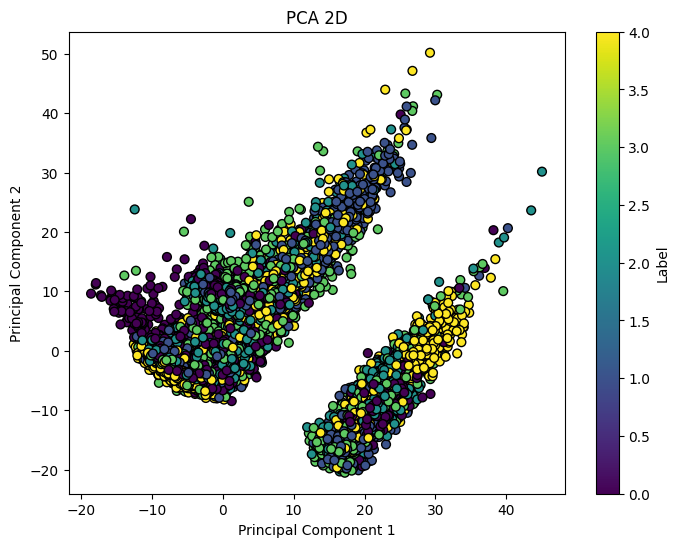

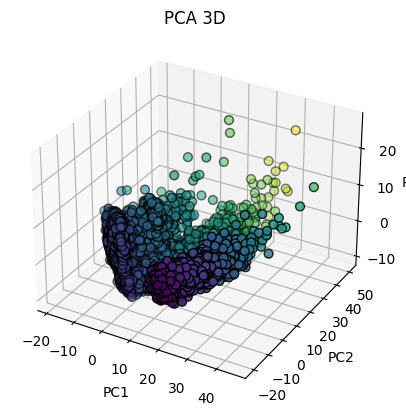

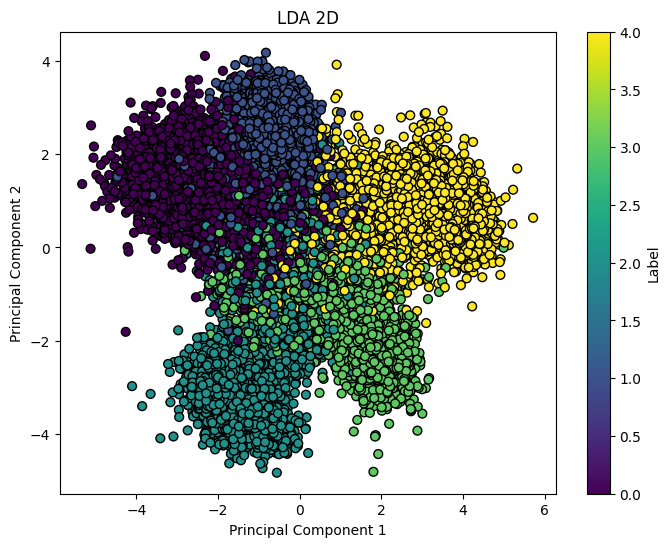

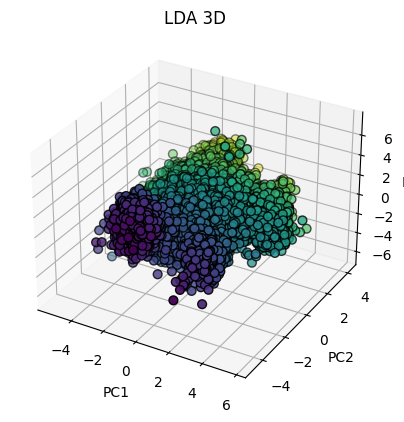

In [39]:

plot_2dim_data(X_train_pca2, y_train, 'PCA 2D', pca_2d_save_location, show=True)
plot_3dim_data_3d(X_train_pca3, y_train, 'PCA 3D', pca_3d_save_location, show=True)
plot_2dim_data(X_train_lda2, y_train, 'LDA 2D', lda_2d_save_location, show=True)
plot_3dim_data_3d(X_train_lda3, y_train, 'LDA 3D', lda_3d_save_location, show=True)

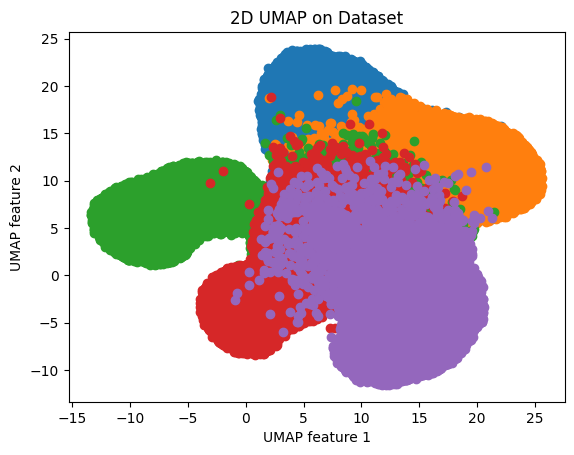

In [40]:
plot_umap(X_train_lda3, y_train, 'DataExtraction/dataresults/umap.png', show=True)

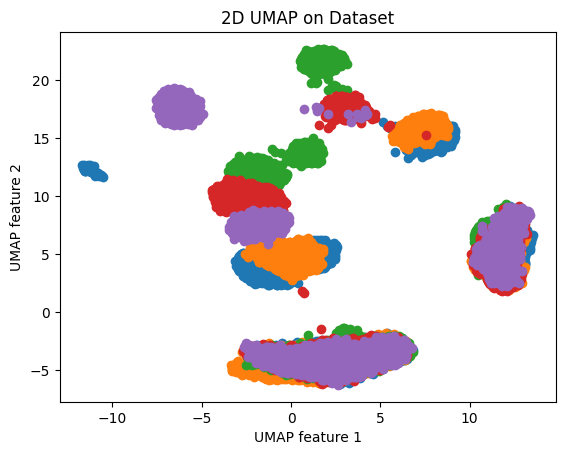

In [41]:
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
plot_umap(X_train_norm, y_train, 'DataExtraction/dataresults/umap_norm.png', show=True)